# **Proyek UTS**
---

### **Link Google Colab untuk Notebook ini:**
#### https://colab.research.google.com/drive/1x2j2LFF3y4odLWrvhqa19uEnlo7Cf6Uo?usp=sharing

## **1. Identitas Kelompok**


### Kecerdasan Buatan 01 - **Kelompok 14**
> #### **Anggota Kelompok:**
2206059383 - Aisyah Arifatul Alya \
2206031826 - Ajriya Muhamad Arkan \
2206059401 - Nakita Rahma Dinanti \
2206030230 - Xavier Daniswara \


#### **Deskripsi Pembagian Tugas:**

**Aisyah Arifatul Alya (2206059383)**
* Mendiskusikan dan memilih tabel data statistik BPS yang akan digunakan.
* Melakukan ekstraksi, pembersihan, dan transformasi data dari tabel dinamis BPS yang dipilih. Termasuk proses parsing data dengan struktur baris dan kolom yang tidak standar menjadi format dataset tabular.

* Menambahkan kolom ‘Provinsi’ dengan memetakan setiap kota/kabupaten secara manual ke provinsi yang sesuai, dengan tujuan untuk menambahkan fitur yang dapat digunakan.

* Melakukan kategorisasi data konsumsi dan pengeluaran berdasarkan nilai kuartil (33% dan 66%) menjadi kategori Low, Medium, dan High.

* Melakukan Data Cleaning & Preprocessing secara menyeluruh, termasuk deteksi dan penanganan outlier berdasarkan perhitungan IQR tiap jenis daging, dan melakukan clipping data outlier sesuai upper bound yang diperoleh.

* Menyusun visualisasi distribusi data menggunakan boxplot untuk mengidentifikasi outlier dan memahami persebaran nilai pada masing-masing fitur.

* Menyusun fungsi untuk pelatihan dan evaluasi model SVM, yang mencakup tuning hyperparameter, perhitungan metrik evaluasi seperti F1-Score, Precision, Recall, dan Accuracy, dan penggunaan metode cross-validation pada Accuracy dan F1-Score untuk menilai performa generalisasi model SVM.

* Membuat fungsi visualisasi dalam bentuk bar graph untuk membandingkan performa model SVM berdasarkan berbagai metrik evaluasi dari setiap kombinasi hyperparameter dan kernel yang digunakan.

* Mengembangkan fungsi visualisasi confusion matrix untuk model SVM pada setiap konfigurasi hyperparameter dari tiap kernel, sehingga keberhasilan dan kegagalan klasifikasi dapat diamati secara lebih rinci.

* Melakukan analisis terhadap hasil klasifikasi untuk mengevaluasi performa masing-masing kernel pada SVM.

---

**Ajriya Muhamad Arkan (2206031826)**
*  Membuat, melatih, dan menguji model klasifikasi Naive Bayes

---

**Nakita Rahma Dinanti (2206059401)**
*   Membantu memilih dataset dari Badan Pusat Statistik (BPS) yang relevan untuk digunakan.
*   Membuat, melatih, dan menguji model klasifikasi Random Forest dengan hyperparameter yang telah ditetapkan.
*   Melakukan optimasi hyperparameter untuk meningkatkan akurasi model Random Forest.
*   Menyusun kesimpulan berdasarkan hasil eksperimen yang telah dilakukan serta memberikan rekomendasi model terbaik untuk digunakan berdasarkan hasil analisis kuantitatif.

---

**Xavier Daniswara (2206030230)**
*   Membuat, melatih, dan menguji model klasifikasi K-Nearest Neighbor.

## **2. Deskripsi Data**

> Data yang digunakan untuk Proyek UTS ini diperoleh dari https://www.bps.go.id/id/query-builder, dengan judul **"Rata-rata Konsumsi Perkapita Seminggu Menurut Kelompok Daging Per Kabupaten/Kota"** dan **"Rata-rata Pengeluaran Perkapita Seminggu Menurut Kelompok Daging Per Kabupaten/Kota"**.

> Kedua tabel dinamis yang kami pilih menawarkan data dari tahun 2018 hingga 2024, 9 karakteristik dari daging, dan 514 judul baris yang merupakan kota dan kabupaten yang ada di Indonesia. Kami memilih dua tabel dinamis tersebut karena keduanya saling melengkapi dan memberikan gambaran mengenai pola konsumsi sekaligus besarnya pengeluaran masyarakat terhadap kelompok daging di Indonesia.

> Untuk keperluan proyek ini, kami memutuskan untuk menggunakan data tahun 2021 hingga 2024. Hal ini dilatarbelakangi oleh diperlukannya sampel yang banyak untuk setiap kelas yang ada, namun perlu juga meminimalkan entri yang kosong. Selain itu, berdasarkan pengecekan data menggunakan query secara langsung, data dari tahun 2021 hingga 2024 memiliki entri NaN yang lebih sedikit dibandingkan tahun-tahun sebelumnya, sehingga mengurangi kehilangan data saat proses cleaning.

> Dari 9 karakteristik yang tersedia, yaitu 'Daging sapi', 'Daging kambing, domba/biri-biri', 'Daging babi', 'Daging ayam ras', 'Daging ayam kampung', 'Daging segar lainnya', 'Daging diawetkan lainnya', 'Tetelan, sandung lamur', dan 'Lainnya (hati, jeroan, iga, kaki, buntut, kepala, dsb)'. Akan tetapi, kami memilih untuk fokus pada 3 karakteristik, yaitu 'Daging sapi', 'Daging ayam ras', dan 'Daging ayam kampung', karena karakteristik lainnya cenderung memiliki data yang sparse.

> Untuk memperkaya dataset yang akan digunakan, kami menambahkan kolom 'Provinsi' secara manual dengan memetakan setiap kabupaten/kota ke provinsinya. Selain itu, kami juga mengelompokkan data konsumsi dan pengeluaran menjadi tiga kategori, yaitu Low, Medium, dan High, untuk menghasilkan kolom 'Kategori_Konsumsi' dan 'Kategori_Pengeluaran'. Proses pengelompokkan data ini akan dijelaskan secara rinci pada bagian Data Cleaning & Preprocessing.

## **3. Data Cleaning & Preprocessing**

### **3.1. Transformasi Tabel**

> Untuk data mentah dari setiap tahun (2018--2024), kami memilih untuk mengunduhnya secara terpisah, kemudian menggabungkan semuanya setelah format dari data sudah diubah dari flat table menjadi standard table. Untuk melakukan transformasi data dari BPS yang memiliki format flat table menjadi standard table, kami menggunakan script berikut:

> **A. Data Konsumsi**

```
bps_data_path = '/content/drive/MyDrive/konsumsi-daging-2024.xlsx'
sheet_name = 'Data 1'  

df_bps = pd.read_excel(bps_data_path, sheet_name=sheet_name)
komoditas_row = df_bps.iloc[0]
tahun_row = df_bps.iloc[1]

df_data_only = df_bps.drop([0, 1]).reset_index(drop=True)
df_data_only.rename(columns={df_data_only.columns[0]: 'Kabupaten_Kota'}, inplace=True)

records = []

for i in range(1, len(df_bps.columns)):
    komoditas = komoditas_row.iloc[i]
    tahun = tahun_row.iloc[i]

    if pd.isna(komoditas) or pd.isna(tahun):
        continue

    konsumsi_series = df_data_only.iloc[:, i]

    for idx, konsumsi in konsumsi_series.items():
        kota = df_data_only.loc[idx, 'Kabupaten_Kota']
        if pd.isna(kota) or kota == '-':
            continue

        records.append({
            'Kabupaten_Kota': kota,
            'Jenis_Daging': str(komoditas).strip(),
            'Tahun': int(tahun),
            'Konsumsi_per_Minggu_dalam_Kg': pd.to_numeric(konsumsi, errors='coerce')
        })

df_transformed_bps = pd.DataFrame(records)

bps_output_path = '/content/drive/MyDrive/dataset-konsumsi-daging-2024.xlsx'  
df_transformed_bps.to_excel(bps_output_path, index=False)
print(f"Transformed BPS Data Berhasil Disimpan ke: {bps_output_path}")
```
> **B. Data Pengeluaran**

```
bps_data_path = '/content/drive/MyDrive/pengeluaran-daging-2024.xlsx'
sheet_name = 'Data 1'  

df_bps = pd.read_excel(bps_data_path, sheet_name=sheet_name)
komoditas_row = df_bps.iloc[0]
tahun_row = df_bps.iloc[1]

df_data_only = df_bps.drop([0, 1]).reset_index(drop=True)
df_data_only.rename(columns={df_data_only.columns[0]: 'Kabupaten_Kota'}, inplace=True)

records = []

for i in range(1, len(df_bps.columns)):
    komoditas = komoditas_row.iloc[i]
    tahun = tahun_row.iloc[i]

    if pd.isna(komoditas) or pd.isna(tahun):
        continue

    pengeluaran_series = df_data_only.iloc[:, i]

    for idx, pengeluaran in pengeluaran_series.items():
        kota = df_data_only.loc[idx, 'Kabupaten_Kota']
        if pd.isna(kota) or kota == '-':
            continue

        records.append({
            'Kabupaten_Kota': kota,
            'Jenis_Daging': str(komoditas).strip(),
            'Tahun': int(tahun),
            'Pengeluaran_per_Minggu_dalam_IDR': pd.to_numeric(pengeluaran, errors='coerce')
        })

df_transformed_bps = pd.DataFrame(records)

bps_output_path = '/content/drive/MyDrive/dataset-pengeluaran-daging-2024.xlsx'

df_transformed_bps.to_excel(bps_output_path, index=False)
print(f"Transformed BPS Data Berhasil Disimpan ke: {bps_output_path}")
```
> Kedua script di atas cukup identik dan memiliki fungsi yang sama, namun ada perbedaan pada satu kolom, yaitu kolom keempat untuk data konsumsi adalah 'Konsumsi_per_Minggu_dalam_Kg' dan untuk data pengeluaran adalah 'Pengeluaran_per_Minggu_dalam_IDR'. Kedua script di atas dijalankan sebanyak empat kali, karena data dari BPS kami unduh secara terpisah per tahunnya.










### **3.2. Kategorisasi Data Konsumsi dan Pengeluaran**

> Pada bagian ini, dilakukan proses **kategorisasi data numerik** menjadi data kategorikal untuk dua atribut:
- `Konsumsi_per_Minggu_dalam_Kg`
- `Pengeluaran_per_Minggu_dalam_IDR`

> Tujuan dari proses ini adalah untuk **mengelompokkan nilai konsumsi dan pengeluaran menjadi tiga kategori**:
- **Low (Rendah)**
- **Medium (Sedang)**
- **High (Tinggi)**

#### **3.2.1. Tahapan Kategorisasi**

1. **Membaca Dataset**  
   Data dibaca dari file Excel bernama `konsumsi-pengeluaran-daging-tanpa-kategori.xlsx` pada sheet *Data 1*.

2. **Menghitung Kuantil (Quantile)**  
   Digunakan **kuantil ke-33% dan 66%** untuk menentukan batas kategori:
     - **Low**: ≤ Q33
     - **Medium**: > Q33 dan ≤ Q66
     - **High**: > Q66

3. **Fungsi Kategorisasi**  
   Dua fungsi `categorize_konsumsi()` dan `categorize_pengeluaran()` dibuat untuk mengevaluasi nilai dan mengembalikan kategori berdasarkan kuantil.

4. **Penanganan Data Kosong (NaN)**  
   Jika nilai konsumsi atau pengeluaran kosong, maka akan dikategorikan sebagai `'Unknown'`.

5. **Hasil Akhir**  
   Dua kolom baru ditambahkan ke dalam dataset:
   - `Kategori_Konsumsi`
   - `Kategori_Pengeluaran`

   Dan menampilkan output berikut:
   ```
   Threshold Konsumsi (Kg) -> Low: <= 0.008, Medium: <= 0.035, High: > 0.035
Threshold Pengeluaran (IDR) -> Low: <= 616.61, Medium: <= 1890.25, High: > 1890.25
   ```
   Dataset yang telah dikategorikan kemudian disimpan kembali ke file Excel baru.


   > Python script di bawah ini akan melakukan langkah-langkah di atas untuk menentukan kategori dan menambahkannya ke dalam file .xlsx baru.

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
# Untuk penyimpanan file output
# drive.mount('/content/drive')

In [ ]:
# Script ini berfungsi, namun memerlukan output path untuk melakukan penyimpanan file
nocat_url = 'https://raw.githubusercontent.com/arifatalya/Proyek-UTS-AI01_14/main/dataset/konsumsi-pengeluaran-daging-tanpa-kategori.csv'
nocat_df = pd.read_csv(nocat_url)

konsumsi_quantiles = nocat_df['Konsumsi_per_Minggu_dalam_Kg'].quantile([0.33, 0.66])
pengeluaran_quantiles = nocat_df['Pengeluaran_per_Minggu_dalam_IDR'].quantile([0.33, 0.66])

low_konsumsi_thresh = konsumsi_quantiles[0.33]
high_konsumsi_thresh = konsumsi_quantiles[0.66]

low_pengeluaran_thresh = pengeluaran_quantiles[0.33]
high_pengeluaran_thresh = pengeluaran_quantiles[0.66]

def categorize_konsumsi(konsumsi):
    if pd.isna(konsumsi):
        return 'Unknown'
    elif konsumsi <= low_konsumsi_thresh:
        return 'Low'
    elif konsumsi <= high_konsumsi_thresh:
        return 'Medium'
    else:
        return 'High'

def categorize_pengeluaran(pengeluaran):
    if pd.isna(pengeluaran):
        return 'Unknown'
    elif pengeluaran <= low_pengeluaran_thresh:
        return 'Low'
    elif pengeluaran <= high_pengeluaran_thresh:
        return 'Medium'
    else:
        return 'High'

nocat_df['Kategori_Konsumsi'] = nocat_df['Konsumsi_per_Minggu_dalam_Kg'].apply(categorize_konsumsi)
nocat_df['Kategori_Pengeluaran'] = nocat_df['Pengeluaran_per_Minggu_dalam_IDR'].apply(categorize_pengeluaran)

# nocat_output_path = '/content/drive/MyDrive/test-dataset-konsumsi-pengeluaran-daging-per-kapita.xlsx'
# nocat_df.to_excel(nocat_output_path, index=False)

print(f"Threshold Konsumsi (Kg) -> Low: <= {low_konsumsi_thresh:.3f}, Medium: <= {high_konsumsi_thresh:.3f}, High: > {high_konsumsi_thresh:.3f}")
print(f"Threshold Pengeluaran (IDR) -> Low: <= {low_pengeluaran_thresh:.2f}, Medium: <= {high_pengeluaran_thresh:.2f}, High: > {high_pengeluaran_thresh:.2f}")

Threshold Konsumsi (Kg) -> Low: <= 0.008, Medium: <= 0.035, High: > 0.035
Threshold Pengeluaran (IDR) -> Low: <= 616.61, Medium: <= 1890.25, High: > 1890.25


### **3.3. Data Cleaning**

##### Import library yang akan digunakan dan memuat dataset dari repositori Github:

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display

In [ ]:
url = 'https://raw.githubusercontent.com/arifatalya/Proyek-UTS-AI01_14/main/dataset/dataset-konsumsi-pengeluaran-daging-per-kapita.csv'
df = pd.read_csv(url)
df.head(25)

,Kabupaten_Kota,Provinsi,Jenis_Daging,Tahun,Konsumsi_per_Minggu_dalam_Kg,Pengeluaran_per_Minggu_dalam_IDR,Kategori_Konsumsi,Kategori_Pengeluaran
0,Simeulue,Aceh,Daging sapi,2021,0.002,266.95,Low,Low
1,Aceh Singkil,Aceh,Daging sapi,2021,0.003,364.28,Low,Low
2,Aceh Selatan,Aceh,Daging sapi,2021,0.001,117.69,Low,Low
3,Aceh Tenggara,Aceh,Daging sapi,2021,0.003,442.51,Low,Low
4,Aceh Timur,Aceh,Daging sapi,2021,0.001,119.32,Low,Low
5,Aceh Tengah,Aceh,Daging sapi,2021,0.005,774.59,Low,Medium
6,Aceh Barat,Aceh,Daging sapi,2021,0.003,392.95,Low,Low
7,Aceh Besar,Aceh,Daging sapi,2021,0.006,803.24,Low,Medium
8,Pidie,Aceh,Daging sapi,2021,0.004,540.50,Low,Low
9,Bireuen,Aceh,Daging sapi,2021,0.006,934.15,Low,Medium


#### **3.3.1. Mengatasi Data NaN**

> Berdasarkan tampilan data sebelumnya, dapat dilihat bahwa terdapat entri 'Unknown'. Untuk mengatasi hal tersebut, entri akan dihapus untuk mencegah gangguan pada proses pelatihan model, serta memastikan bahwa data yang digunakan bersih dan valid secara klasifikasi.

In [ ]:
df_clean = df.dropna()
df_clean.head(25)

,Kabupaten_Kota,Provinsi,Jenis_Daging,Tahun,Konsumsi_per_Minggu_dalam_Kg,Pengeluaran_per_Minggu_dalam_IDR,Kategori_Konsumsi,Kategori_Pengeluaran
0,Simeulue,Aceh,Daging sapi,2021,0.002,266.95,Low,Low
1,Aceh Singkil,Aceh,Daging sapi,2021,0.003,364.28,Low,Low
2,Aceh Selatan,Aceh,Daging sapi,2021,0.001,117.69,Low,Low
3,Aceh Tenggara,Aceh,Daging sapi,2021,0.003,442.51,Low,Low
4,Aceh Timur,Aceh,Daging sapi,2021,0.001,119.32,Low,Low
5,Aceh Tengah,Aceh,Daging sapi,2021,0.005,774.59,Low,Medium
6,Aceh Barat,Aceh,Daging sapi,2021,0.003,392.95,Low,Low
7,Aceh Besar,Aceh,Daging sapi,2021,0.006,803.24,Low,Medium
8,Pidie,Aceh,Daging sapi,2021,0.004,540.50,Low,Low
9,Bireuen,Aceh,Daging sapi,2021,0.006,934.15,Low,Medium


#### **3.3.2. Clipping Data Outlier**

##### **A. Mengidentifikasi Outlier**
> Pada bagian ini, dilakukan deteksi outlier berdasarkan **nilai ekstrem** pada atribut konsumsi dan pengeluaran mingguan.

- Untuk **konsumsi**, entri dengan nilai lebih dari **10 kg/minggu** diidentifikasi sebagai outlier karena jauh melebihi batas wajar konsumsi per kapita.
- Untuk **pengeluaran**, digunakan batas **Rp 100.000/minggu** sebagai threshold. Akan tetapi, tidak ditemukan entri yang melebihi batas tersebut.



In [ ]:
# Consumption per Week Outliers
con_outliers = df_clean[df_clean['Konsumsi_per_Minggu_dalam_Kg'] > 10]
print("Outlier Rows (Konsumsi > 10 kg/week):")
print(con_outliers[['Kabupaten_Kota', 'Jenis_Daging', 'Tahun', 'Konsumsi_per_Minggu_dalam_Kg']])

Outlier Rows (Konsumsi > 10 kg/week):
     Kabupaten_Kota         Jenis_Daging  Tahun  Konsumsi_per_Minggu_dalam_Kg
5109       Tambrauw          Daging sapi   2024                       564.000
5128         Paniai          Daging sapi   2024                       101.000
5129     Intan Jaya          Daging sapi   2024                       988.000
5132          Nduga          Daging sapi   2024                       234.000
6154         Deiyai  Daging ayam kampung   2024                        12.107


In [ ]:
# Expenditure per Week Outliers
exp_outliers = df_clean[df_clean['Pengeluaran_per_Minggu_dalam_IDR'] > 100000]
print("Outlier Rows (Pengeluaran > Rp 100000/week):")
print(exp_outliers[['Kabupaten_Kota', 'Jenis_Daging', 'Tahun', 'Pengeluaran_per_Minggu_dalam_IDR']])

Outlier Rows (Pengeluaran > Rp 100000/week):
Empty DataFrame
Columns: [Kabupaten_Kota, Jenis_Daging, Tahun, Pengeluaran_per_Minggu_dalam_IDR]
Index: []


##### **B. Menentukan Upper Bound Data Clipping**

> Untuk mendeteksi dan menangani outlier, dilakukan perhitungan Interquartile Range (IQR) secara terpisah untuk setiap jenis daging. Proses ini mencakup perhitungan kuartil pertama (Q1), kuartil ketiga (Q3), serta IQR untuk masing-masing kelompok data. Berdasarkan nilai IQR, ditentukan batas atas (upper bound) sebagai acuan identifikasi outlier, yaitu nilai yang melebihi Q3 + 1.5 × IQR. Hasil analisis ini mencakup jumlah dan persentase data outlier per jenis daging, dan upper bound yang digunakan untuk batas atas *data clipping*.


In [ ]:
for meat in df_clean['Jenis_Daging'].unique():
    meat_df = df_clean[df_clean['Jenis_Daging'] == meat]
    q1 = meat_df['Konsumsi_per_Minggu_dalam_Kg'].quantile(0.25)
    q3 = meat_df['Konsumsi_per_Minggu_dalam_Kg'].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr

    outlier_count = (meat_df['Konsumsi_per_Minggu_dalam_Kg'] > upper_bound).sum()
    percent_outlier = (outlier_count / meat_df.shape[0]) * 100

    print(f"\nJenis Daging: {meat}")
    print(f"Q1: {q1:.5f} kg/minggu")
    print(f"Q3: {q3:.5f} kg/minggu")
    print(f"IQR: {iqr:.5f} kg/minggu")
    print(f"Upper Bound: {upper_bound:.5f} kg/minggu")
    print(f"Jumlah outlier: {outlier_count} dari {meat_df.shape[0]} data")
    print(f"Persentase outlier: {percent_outlier:.5f}%")


Jenis Daging: Daging sapi
Q1: 0.00200 kg/minggu
Q3: 0.00900 kg/minggu
IQR: 0.00700 kg/minggu
Upper Bound: 0.01950 kg/minggu
Jumlah outlier: 132 dari 1864 data
Persentase outlier: 7.08155%

Jenis Daging: Daging ayam ras
Q1: 0.06300 kg/minggu
Q3: 0.15600 kg/minggu
IQR: 0.09300 kg/minggu
Upper Bound: 0.29550 kg/minggu
Jumlah outlier: 5 dari 2056 data
Persentase outlier: 0.24319%

Jenis Daging: Daging ayam kampung
Q1: 0.00800 kg/minggu
Q3: 0.02300 kg/minggu
IQR: 0.01500 kg/minggu
Upper Bound: 0.04550 kg/minggu
Jumlah outlier: 110 dari 2048 data
Persentase outlier: 5.37109%


##### **C. Clipping Data Konsumsi per Jenis Daging**

Setelah batas atas (upper bound) untuk konsumsi mingguan ditentukan berdasarkan nilai IQR masing-masing jenis daging, dilakukan proses **clipping** untuk membatasi nilai konsumsi yang ekstrem. Nilai konsumsi yang melebihi batas akan dipotong (di-clip) menjadi sama dengan nilai upper bound-nya.

> Proses ini dilakukan untuk:
- Mengurangi dampak outlier ekstrem.
- Menyesuaikan distribusi data agar tetap realistis dan tidak bias.
- Menjaga integritas data dengan memodifikasi seminimal mungkin.

Hasilnya, sebanyak **247 entri dari 5968 data** mengalami clipping, dengan rincian per jenis daging seperti terlihat pada output.


In [ ]:
upper_bounds = {
    'Daging sapi': 0.0195,
    'Daging ayam ras': 0.2955,
    'Daging ayam kampung': 0.0455
}

total_capped = 0
df_clipped = df_clean.copy()

for meat, ub in upper_bounds.items():
    mask = (df_clipped['Jenis_Daging'] == meat) & (df_clipped['Konsumsi_per_Minggu_dalam_Kg'] > ub)
    capped_count = mask.sum()
    total_capped += capped_count
    df_clipped.loc[mask, 'Konsumsi_per_Minggu_dalam_Kg'] = ub

    print(f"Jenis Daging: {meat}")
    print(f"Jumlah data yang dicap: {capped_count}\n")

print(f"Total jumlah data yang di-cap: {total_capped} dari {df_clean.shape[0]} data")

Jenis Daging: Daging sapi
Jumlah data yang dicap: 132

Jenis Daging: Daging ayam ras
Jumlah data yang dicap: 5

Jenis Daging: Daging ayam kampung
Jumlah data yang dicap: 110

Total jumlah data yang di-cap: 247 dari 5968 data


##### **D. Verifikasi Data Setelah Clipping**
> Setelah proses clipping dilakukan, dilakukan verifikasi ulang terhadap data konsumsi untuk memastikan tidak ada lagi nilai ekstrem di atas **10 kg/minggu** karena sudah dibatasi dengan upper bound.  Hasilnya menunjukkan bahwa **seluruh data ekstrem berhasil dikendalikan**, ditandai dengan **tidaknya ditemukan entri outlier baru**.

In [ ]:
con_outliers = df_clipped[df_clipped['Konsumsi_per_Minggu_dalam_Kg'] > 10]
print("Outlier Rows (Konsumsi > 10 kg/week):")
print(con_outliers[['Kabupaten_Kota', 'Jenis_Daging', 'Tahun', 'Konsumsi_per_Minggu_dalam_Kg']])

Outlier Rows (Konsumsi > 10 kg/week):
Empty DataFrame
Columns: [Kabupaten_Kota, Jenis_Daging, Tahun, Konsumsi_per_Minggu_dalam_Kg]
Index: []


##### **E. Visualisasi Konsumsi dan Pengeluaran**
> Untuk melihat sebaran data secara visual, dibuat dua boxplot menggunakan dataset hasil clipping:

- **Boxplot 1**: Menampilkan distribusi konsumsi mingguan berdasarkan jenis daging.  
  Visualisasi ini membantu dalam melihat perbedaan konsumsi antar jenis daging, serta persebaran nilai normal dan ekstrem.

- **Boxplot 2**: Menampilkan distribusi pengeluaran mingguan berdasarkan provinsi.  
  Visualisasi ini memberikan gambaran pengeluaran di berbagai provinsi, dan membantu mengidentifikasi provinsi dengan pengeluaran tertinggi atau terendah.

In [ ]:
# Boxplot 1: Konsumsi berdasarkan Jenis Daging
boxplot1 = px.box(
    df_clipped,
    x='Jenis_Daging',
    y='Konsumsi_per_Minggu_dalam_Kg',
    title='Konsumsi per Minggu (Kg) berdasarkan Jenis Daging',
    labels={
        'Konsumsi_per_Minggu_dalam_Kg': 'Konsumsi (Kg/Minggu)',
        'Jenis_Daging': 'Jenis Daging'
    },
    points='all'
)
boxplot1.update_traces(marker=dict(size=6, line=dict(width=0.5, color='#000000')))
boxplot1.update_layout(xaxis_tickangle=-45, height=800, width=1000, title_x=0.5)
boxplot1.update_yaxes(tickmode='linear', dtick=0.025)

boxplot1.show()

In [ ]:
# Boxplot 2: Pengeluaran berdasarkan Provinsi
boxplot2 = px.box(
    df_clipped,
    x='Provinsi',
    y='Pengeluaran_per_Minggu_dalam_IDR',
    title='Pengeluaran per Minggu (IDR) berdasarkan Provinsi',
    labels={
        'Pengeluaran_per_Minggu_dalam_IDR': 'Pengeluaran (IDR/Minggu)',
        'Provinsi': 'Provinsi'
    },
    points='all'
)
boxplot2.update_traces(marker=dict(size=6, line=dict(width=0.5, color='#000000')))
boxplot2.update_layout(xaxis_tickangle=-90, height=800, width=1400, title_x=0.5)
boxplot2.update_yaxes(tickmode='linear', dtick=2000)

boxplot2.show()

## **4. Implementasi Classifier**

> Sebelum melakukan pengujian per classifier, dilakukan proses encoding data kategorikal menggunakan `LabelEncoder`, seperti nama kabupaten/kota, provinsi, jenis daging, kategori konsumsi, dan kategori pengeluaran.

In [ ]:
le_kota = LabelEncoder()
le_prov = LabelEncoder()
le_jenis = LabelEncoder()
le_kategori_konsumsi = LabelEncoder()
le_kategori_pengeluaran = LabelEncoder()

df_clipped['Kabupaten_Kota_Enc'] = le_kota.fit_transform(df_clipped['Kabupaten_Kota'])
df_clipped['Provinsi_Enc'] = le_prov.fit_transform(df_clipped['Provinsi'])
df_clipped['Jenis_Daging_Enc'] = le_jenis.fit_transform(df_clipped['Jenis_Daging'])
df_clipped['Kategori_Konsumsi_Enc'] = le_kategori_konsumsi.fit_transform(df_clipped['Kategori_Konsumsi'])
df_clipped['Kategori_Pengeluaran_Enc'] = le_kategori_pengeluaran.fit_transform(df_clipped['Kategori_Pengeluaran'])

> Pada tahap di bawah ini, dipilih beberapa fitur sebagai **variabel input (fitur/X)** dan satu kolom sebagai **variabel target (y)**. Fitur yang digunakan adalah `Kategori_Konsumsi_Enc`, `Konsumsi_per_Minggu_dalam_Kg`, `Kabupaten_Kota_Enc`, dan `Jenis_Daging_Enc`.
Fitur-fitur tersebut dianggap paling relevan dalam mempengaruhi **kategori pengeluaran**, karena konsumsi per minggu dan jenis daging secara langsung terkait dengan kebutuhan dan tingkat pengeluaran rumah tangga.

> Sebagai target, dipilih kolom `Kategori_Pengeluaran_Enc`, yaitu hasil encoding dari kategori pengeluaran ('Low', 'Medium', 'High') yang sebelumnya telah dikategorikan menggunakan metode kuartil. Pemilihan target ini bertujuan agar model klasifikasi dapat memprediksi kategori pengeluaran berdasarkan pola konsumsi dan daerah.


> Setelah itu, fitur-fitur ini distandarisasi menggunakan `StandardScaler` agar memiliki skala yang seragam. Dataset kemudian dibagi menjadi data latih dan data uji menggunakan `train_test_split` dengan proporsi 80% data latih dan 20% data uji.

In [ ]:
X = df_clipped[['Kategori_Konsumsi_Enc', 'Konsumsi_per_Minggu_dalam_Kg', 'Kabupaten_Kota_Enc', 'Jenis_Daging_Enc',]]
y = df_clipped['Kategori_Pengeluaran_Enc']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### **4.1. Support Vector Machine (SVM)**

#### **4.1.1. Teori**
---

> Support Vector Machine (SVM) merupakan algoritma supervised learning yang digunakan untuk menyelesaikan masalah klasifikasi dan regresi [1]. Inti dari SVM adalah mencari hyperplane atau garis batas terbaik yang memisahkan data dari kelas-kelas berbeda dengan margin selebar mungkin. Data yang berada paling dekat dengan hyperplane disebut support vectors, dan posisi mereka sangat penting dalam menentukan hyperplane yang optimal [1].

> Pada kasus di mana data tidak dapat dipisahkan secara linear, SVM memanfaatkan **Kernel Function** untuk memetakan data dari ruang berdimensi rendah ke ruang berdimensi lebih tinggi (misalnya, dari 1 dimensi ke 2 dimensi atau lebih), sehingga data menjadi lebih mudah dipisahkan secara linear. Kernel Function ini memungkinkan transformasi dilakukan secara implisit tanpa benar-benar menghitung koordinat dalam ruang dimensi tinggi, melalui teknik yang disebut **Kernel Trick** [1], [3].


> **A. Linear Kernel** \
Linear Kernel digunakan pada data yang dapat dipisahkan secara linear tanpa perlu pemetaan ke dimensi yang lebih tinggi. Kernel ini merupakan pilihan yang efisien dan sederhana untuk kasus linearly separable [1], [2].

$$
K(x, x') = x^\top x'
$$


> **B. Polynomial Kernel** \
Fungsi kernel ini memetakan data ke ruang berdimensi lebih tinggi melalui operasi polinomial dengan degree tertentu. Kernel ini cocok untuk menangani data dengan hubungan non-linear, namun masih mengikuti pola tertentu [2].

$$
K(x, x') = (x^\top x' + c)^d
$$
- d = Derajat polinomial (degree)  
- c = Konstanta bebas (bias)


> **C. Radial Basis Function (RBF) Kernel** \
RBF Kernel adalah kernel yang paling sering digunakan pada SVM, karena mampu memetakan data ke dalam ruang berdimensi tak hingga, yang menjadikannya efektif untuk menangani pola data yang kompleks dan non-linear [2]. Kernel ini mengukur kesamaan antara dua titik data berdasarkan jaraknya, dan pengaruh satu titik terhadap titik lainnya diatur oleh parameter γ (gamma) [2], [3].

$$
K(x, x') = \exp(-\gamma \|x - x'\|^2)
$$
- gamma (γ) = Parameter yang menentukan tingkat pengaruh dari titik data. Nilai γ kecil menghasilkan pengaruh yang lebih luas, sementara nilai besar membatasi pengaruh pada area yang lebih sempit.


#### **4.1.2. Implementasi**
---

###### **A. Fungsi Pelatihan dan Evaluasi Model SVM**

> Fungsi `svm_training` **digunakan untuk melatih dan mengevaluasi model Support Vector Machine (SVM)** dengan berbagai konfigurasi kernel (Linear, Polynomial, dan RBF) dan hyperparameter. Fungsi ini juga menghitung metrik evaluasi seperti F1-score, Precision, Recall, dan Accuracy, baik pada data uji maupun menggunakan Cross Validation (CV).

In [ ]:
def svm_training(X, y, X_train, X_test, y_train, y_test, kernel_name, svm_settings, cv_folds=5):
    svm_results = []
    svm_matrices = []

    for setting in svm_settings:
        svm = SVC(**setting)

        cv_acc_scores = cross_val_score(svm, X, y, cv=cv_folds, scoring='accuracy')
        avg_cv_accuracy = np.mean(cv_acc_scores)

        cv_f1_scores = cross_val_score(svm, X, y, cv=cv_folds, scoring='f1_weighted')
        avg_cv_f1 = np.mean(cv_f1_scores)

        svm.fit(X_train, y_train)
        y_pred_test = svm.predict(X_test)
        y_pred_train = svm.predict(X_train)

        report_test = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
        report_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)

        test_f1 = report_test['weighted avg']['f1-score']
        train_f1 = report_train['weighted avg']['f1-score']
        precision = report_test['weighted avg']['precision']
        recall = report_test['weighted avg']['recall']
        test_accuracy = accuracy_score(y_test, y_pred_test)

        result_row = pd.DataFrame([{
            'Setting': str(setting),
            'Train_F1': train_f1,
            'Test_F1': test_f1,
            'F1_CV': avg_cv_f1,
            'Precision': precision,
            'Recall': recall,
            'Accuracy_Test': test_accuracy,
            'Accuracy_CV': avg_cv_accuracy
        }])
        svm_results.append(result_row)

        cm = confusion_matrix(y_test, y_pred_test)
        svm_matrices.append((setting, cm))

    svm_results_df = pd.concat(svm_results, ignore_index=True)

    print(f"\nHasil Pengujian SVM - Kernel {kernel_name}:")
    display(svm_results_df)

    return svm_results_df, svm_matrices

###### **B. Visualisasi Confusion Matrix**

> Fungsi `svm_confusion_matrix` akan menampilkan confusion matrix dalam bentuk heatmap dalam grayscale untuk setiap variasi pengujian, untuk membantu menganalisis jumlah prediksi benar dan salah antar kelas.

In [ ]:
def svm_confusion_matrix(svm_matrices, kernel_name):
    for idx, (setting, cm) in enumerate(svm_matrices):
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 8})
        plt.title(f"Confusion Matrix - {kernel_name} Setting {idx+1}\n{setting}", fontsize=10)
        plt.xlabel("Predicted", fontsize=9)
        plt.ylabel("Actual", fontsize=9)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.tight_layout()
        plt.show()

##### **C. Grafik Perbandingan Metrik**

> Fungsi `svm_graph` membuat grafik batang yang membandingkan Train F1-score, Test F1-score, F1 CV, Precision, Recall, Accuracy Test, dan Accuracy CV antar konfigurasi SVM untuk membantu visualisasi performa model secara menyeluruh.

In [ ]:
def svm_graph(svm_results_df, kernel_name):
    plt.figure(figsize=(16, 7))
    bar_width = 0.13
    x = np.arange(len(svm_results_df['Setting']))

    metrics = ['Train_F1', 'Test_F1', 'F1_CV', 'Precision', 'Recall', 'Accuracy_Test', 'Accuracy_CV']
    colors = ['black', 'dimgray', 'gray', 'darkgray', 'silver', 'lightgray', 'gainsboro']

    for i, (metric, color) in enumerate(zip(metrics, colors)):
        bar = plt.bar(x + i * bar_width, svm_results_df[metric], width=bar_width, label=metric.replace('_', ' '), color=color)

        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2., height + 0.005, f'{height:.6f}', ha='center', va='bottom', fontsize=8)

    plt.xticks(x + 3 * bar_width, svm_results_df['Setting'], rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=9)
    plt.legend()
    plt.title(f"Perbandingan Hasil Variasi Hyperparameter - Kernel {kernel_name}", fontsize=12)
    plt.tight_layout()
    plt.show()

#### **4.1.3. Hasil Pengujian**
---

> Setelah proses pelatihan dan pengujian Support Vector Machine (SVM) dengan berbagai kernel, terlebih dahulu didefinisikan array hyperparameter settings untuk setiap jenis kernel, yakni Linear, Polynomial, dan RBF. Selanjutnya, dilakukan pemanggilan fungsi `svm_training()` dengan memasukkan masing-masing array pengaturan tersebut sebagai parameter, untuk melatih model dan mengevaluasi performa tiap kombinasi hyperparameter.

##### **A. Linear Kernel**

In [ ]:
linear_settings = [
    {'kernel': 'linear', 'C': 10},
    {'kernel': 'linear', 'C': 20},
    {'kernel': 'linear', 'C': 50},
]

In [ ]:
results_linear, matrices_linear = svm_training(X_scaled, y, X_train, X_test, y_train, y_test, "Linear", linear_settings)


Hasil Pengujian SVM - Kernel Linear:


,Setting,Train_F1,Test_F1,F1_CV,Precision,Recall,Accuracy_Test,Accuracy_CV
0,"{'kernel': 'linear', 'C': 10}",0.855561,0.851311,0.856790,0.851728,0.851759,0.851759,0.856736
1,"{'kernel': 'linear', 'C': 20}",0.856897,0.851546,0.852635,0.852755,0.850921,0.850921,0.852044
2,"{'kernel': 'linear', 'C': 50}",0.856555,0.848133,0.853387,0.849249,0.847571,0.847571,0.852547


##### **B. Polynomial Kernel**

In [ ]:
poly_settings = [
    {'kernel': 'poly', 'C': 10, 'degree': 3},
    {'kernel': 'poly', 'C': 10, 'degree': 5},
    {'kernel': 'poly', 'C': 20, 'degree': 7},
]

In [ ]:
results_poly, matrices_poly = svm_training(X_scaled, y, X_train, X_test, y_train, y_test, "Polynomial", poly_settings)


Hasil Pengujian SVM - Kernel Polynomial:


,Setting,Train_F1,Test_F1,F1_CV,Precision,Recall,Accuracy_Test,Accuracy_CV
0,"{'kernel': 'poly', 'C': 10, 'degree': 3}",0.422990,0.448399,0.843409,0.589115,0.506700,0.506700,0.843332
1,"{'kernel': 'poly', 'C': 10, 'degree': 5}",0.487697,0.492651,0.856814,0.586760,0.542714,0.542714,0.858072
2,"{'kernel': 'poly', 'C': 20, 'degree': 7}",0.407959,0.413649,0.866430,0.658772,0.458124,0.458124,0.868128


##### **C. RBF Kernel**

In [ ]:
rbf_settings = [
    {'kernel': 'rbf', 'C': 10, 'gamma': 'scale'},
    {'kernel': 'rbf', 'C': 50, 'gamma': 0.1},
    {'kernel': 'rbf', 'C': 100, 'gamma': 1},
]

In [ ]:
results_rbf, matrices_rbf = svm_training(X_scaled, y, X_train, X_test, y_train, y_test, "RBF", rbf_settings)


Hasil Pengujian SVM - Kernel RBF:


,Setting,Train_F1,Test_F1,F1_CV,Precision,Recall,Accuracy_Test,Accuracy_CV
0,"{'kernel': 'rbf', 'C': 10, 'gamma': 'scale'}",0.889324,0.881899,0.883111,0.881823,0.882747,0.882747,0.884046
1,"{'kernel': 'rbf', 'C': 50, 'gamma': 0.1}",0.894802,0.885126,0.884427,0.885008,0.885260,0.885260,0.885050
2,"{'kernel': 'rbf', 'C': 100, 'gamma': 1}",0.903514,0.891330,0.888010,0.891713,0.891122,0.891122,0.888069


#### **4.1.4. Grafik dan Tabel**
---

##### **A. Linear Kernel**

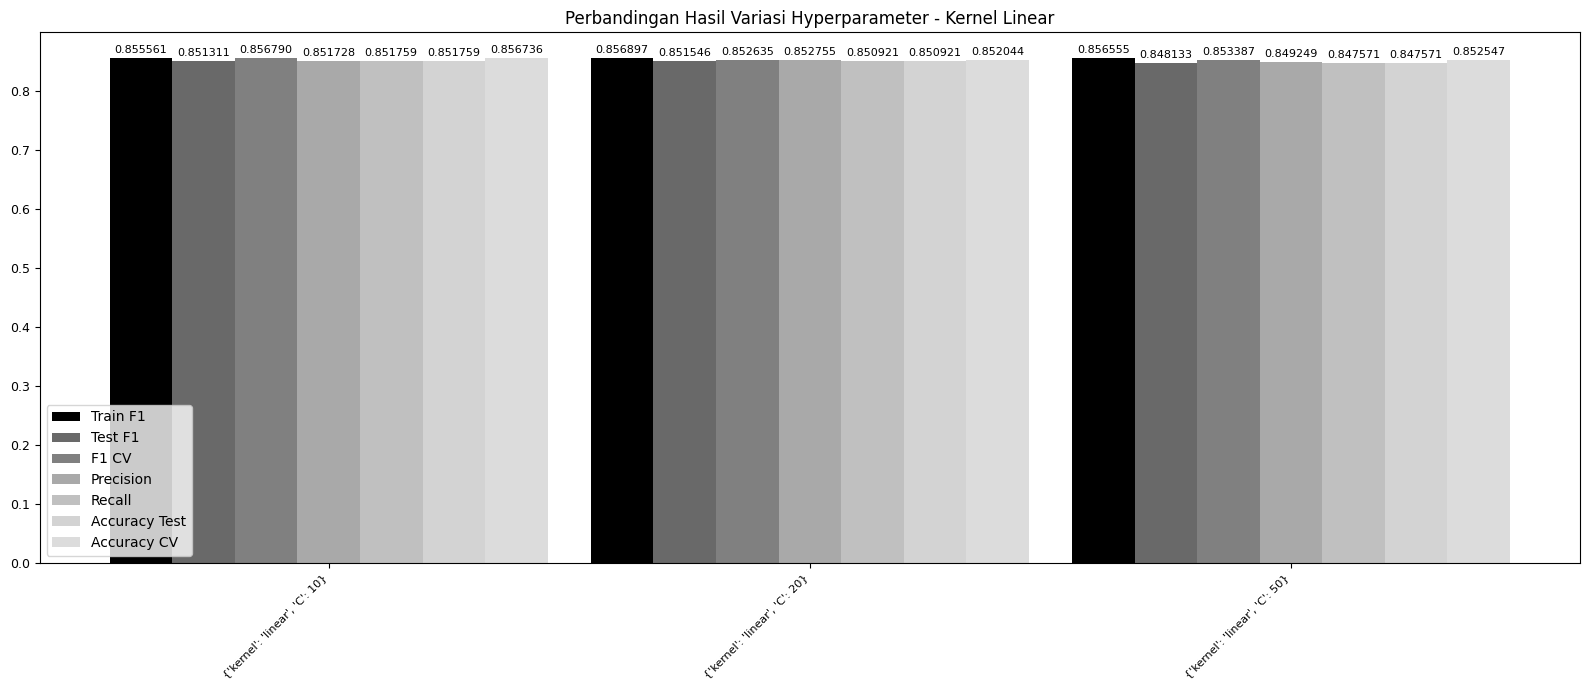

In [ ]:
svm_graph(results_linear, "Linear")

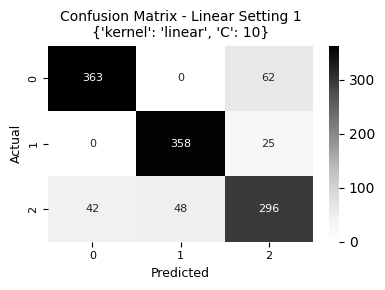

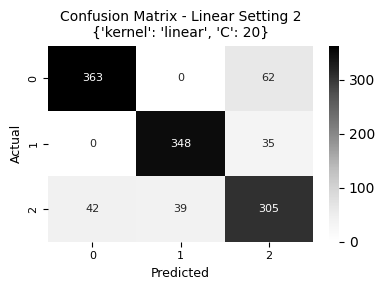

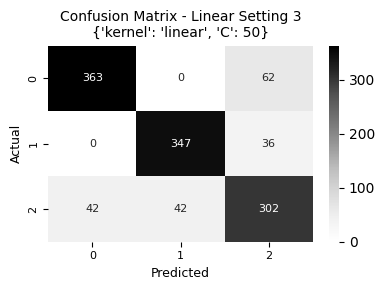

In [ ]:
svm_confusion_matrix(matrices_linear, "Linear")

##### **B. Polynomial Kernel**

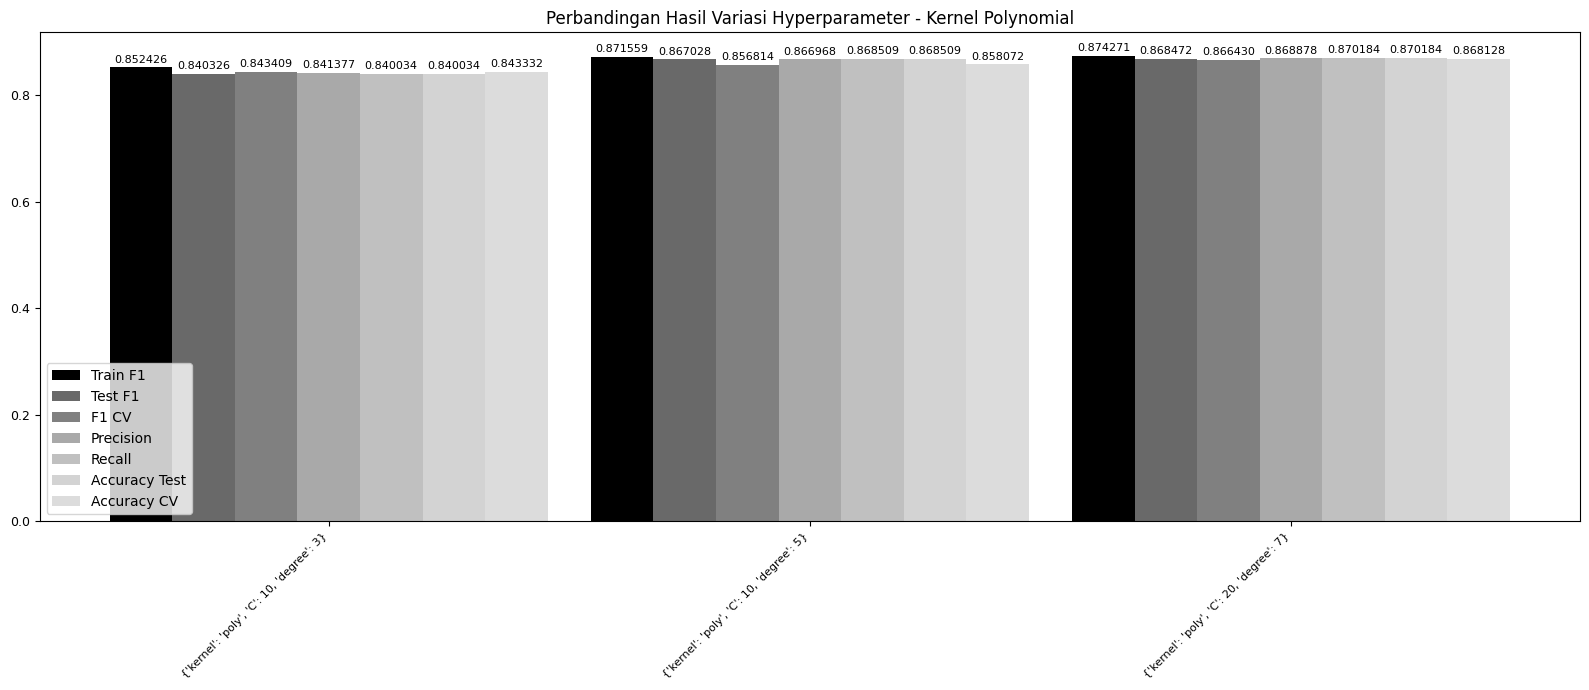

In [ ]:
svm_graph(results_poly, "Polynomial")

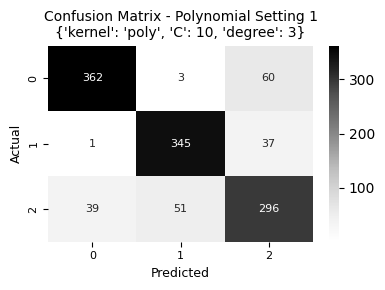

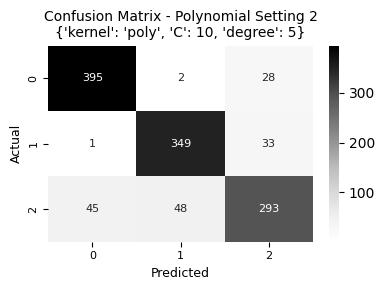

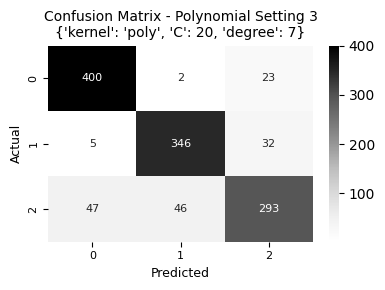

In [ ]:
svm_confusion_matrix(matrices_poly, "Polynomial")

##### **C. RBF Kernel**

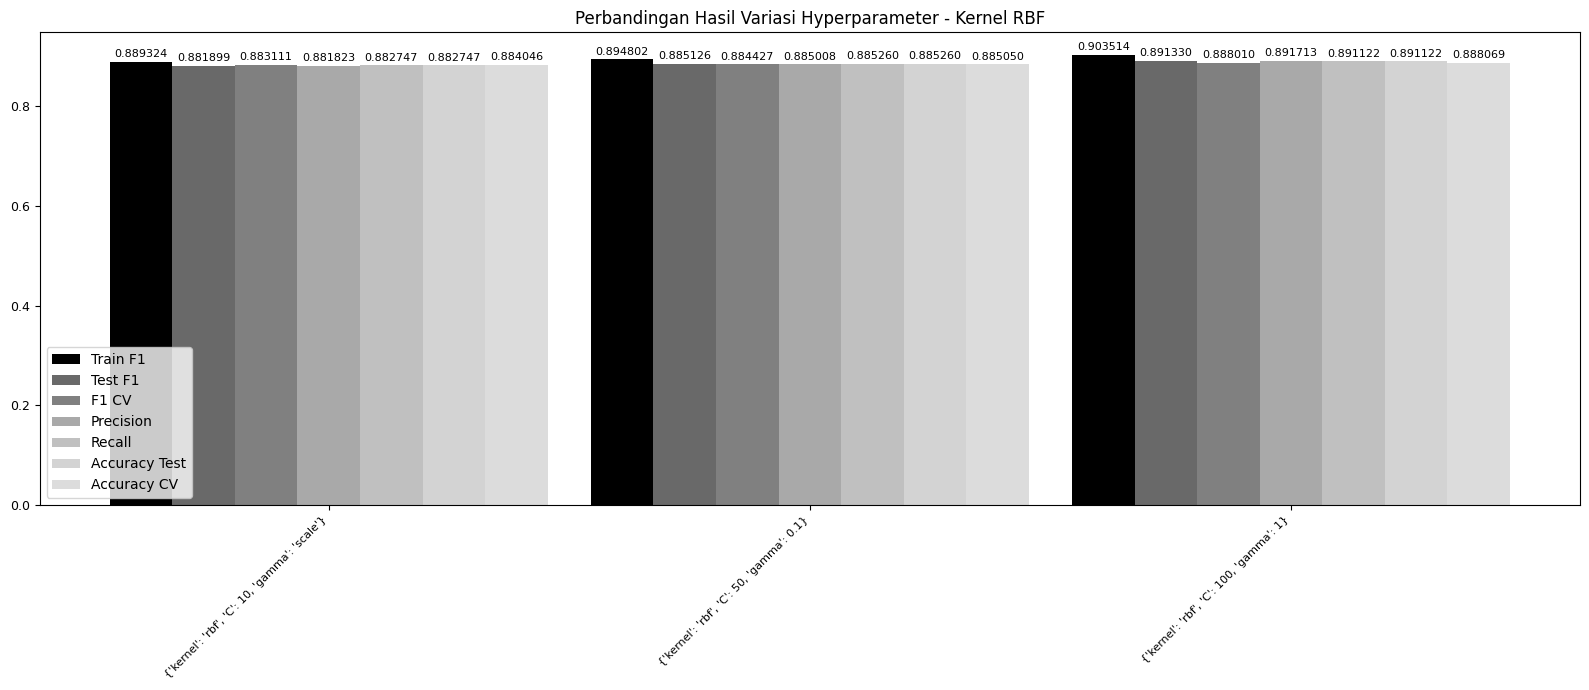

In [ ]:
svm_graph(results_rbf, "RBF")

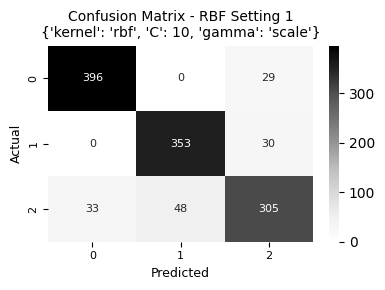

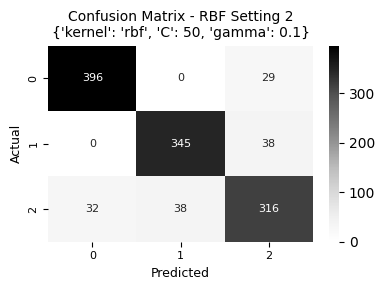

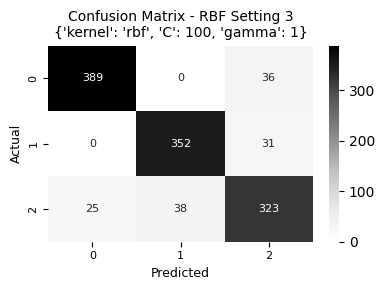

In [ ]:
svm_confusion_matrix(matrices_rbf, "RBF")

#### **4.1.5. Analisis Hasil**
---

##### **A. Linear Kernel**

> Berdasarkan hasil pengujian SVM menggunakan Linear Kernel, terlihat bahwa variasi nilai parameter `C` pada kernel linear memberikan sedikit perbedaan dalam hasil klasifikasi. Dari ketiga pengaturan, yaitu (`C=10`, `C=20`, `C=50`), pengaturan pertama dengan nilai `C=10` menghasilkan performa terbaik dalam konteks generalisasi, yang ditandai dengan F1-score cross-validation tertinggi sebesar 0.856790 dan akurasi test sebesar 85,17%. Akan tetapi, peningkatan nilai `C` tidak signifikan meningkatkan performa, malah cenderung sedikit menurunkan.

> Confusion matrix dari Linear Kernel menunjukkan klasifikasi kelas 1 memiliki performa yang paling baik dengan jumlah kesalahan prediksi terendah dibandingkan kelas lainnya. Kelas 2 merupakan kelas yang paling sering mengalami kesalahan prediksi. Di lain sisi, kelas 0 memiliki jumlah kesalahan prediksi yang sama untuk setiap pengaturan hyperparameter tuning.

> Berdasarkan hasil yang diperoleh, dapat disimpulkan bahwa struktur data tidak sepenuhnya linear, dan terdapat overlap yang terjadi antar kelas yang tidak dapat dipisahkan dengan garis lurus. Maka dari itu, linear kernel kurang cocok dengan dataset ini, karena datanya tidak linearly separable, sedangkan linear kernel hanya cocok untuk data yang dapat dipisahkan dengan garis lurus. Kombinasi dari fitur-fitur yang digunakan juga memengaruhi performa model. Sebagai contoh, `Kabupaten_Kota_Enc` yang sama bisa memiliki pola pengeluaran yang berbeda tergantung jenis daging, dan pola konsumsi juga tidak naik secara linear dengan pengeluaran, karena selain faktor daya beli, terdapat faktor lain seperti demografis yang memengaruhi perbedaan harga antar kota/kabupaten yang berbeda. Hal ini membuat linear separator mengalami kesulitan untuk memisahkan kelas, karena decision boundary yang dihasilkan kemungkinan berbentuk kurva atau bahkan lebih kompleks.

##### **B. Polynomial Kernel**

> Polynomial Kernel menunjukkan peningkatan performa seiring bertambahnya nilai parameter `degree` dan `C`. Pengaturan ketiga (`C=20`, `degree=7`) memberikan hasil terbaik dengan F1-score cross-validation 0.866430 dan akurasi pengujian sebesar 87,02%. Terjadi peningkatan signifikan jika dibandingkan dengan pengaturan pertama (`degree=3`), menandakan bahwa meningkatkan kompleksitas Polynomial Kernel (tingginya nilai `degree`) secara efektif meningkatkan kemampuan model menangkap pola data.

> Confusion matrix pada Polynomial Kernel memperlihatkan bahwa dengan meningkatnya nilai degree yang digunakan, prediksi pada kelas 0 meningkat secara signifikan (misalnya pengaturan ketiga dengan 400 prediksi benar pada kelas 0). Akan tetapi, tetap terlihat bahwa kelas 2 mengalami tingkat kesalahan prediksi yang cukup tinggi dibandingkan kelas lainnya.

> Polynomial kernel bekerja dengan memetakan data ke dimensi yang lebih tinggi, di mana hubungan antara fitur dan label yang non-linear pada dimensi yang lebih rendah menjadi linear di ruang tersebut. Jika degree yang digunakan semakin tinggi, maka kapabilitas model untuk membedakan pola-pola yang rumit juga akan meningkat, namun hal ini juga diikuti dengan risiko overfitting jika degree terlalu besar pada data dengan noise. Berdasarkan percobaam, semakin meningkatnya degree yang digunakan, dapat dilihat bahwa performa juga seiring meningkat, yang menunjukkan bahwa dataset ini memiliki struktur non-linear yang dapat dimodelkan dengan memanfaatkan polynomial kernel. Akan tetapi, setelah titik tertentu, peningkatan degree tidak lagi meningkatkan performa berdasarkan metrik evaluasi yang digunakan.


##### **C. RBF Kernel**

> RBF Kernel secara konsisten menunjukkan performa lebih tinggi dibandingkan dengan Linear Kernel maupun Polynomial Kernel. Pengaturan ketiga (`C=100`, `gamma=1`) menghasilkan performa terbaik secara keseluruhan, dengan F1-score cross-validation mencapai 0.888010 dan akurasi pengujian sebesar 89,11%. Hal ini menunjukkan bahwa RBF Kernel dengan parameter tinggi (`C=100`, `gamma=1`) sangat efektif dalam menangani pola data yang lebih kompleks.

> Dari keseluruhan pengujian, RBF Kernel dengan pengaturan parameter `C=100` dan `gamma=1` memberikan performa terbaik dan paling konsisten dalam mengklasifikasikan data secara akurat, baik dalam pengujian maupun validasi silang. Polynomial Kernel dengan nilai `degree` tinggi juga cukup menjanjikan, sedangkan kernel linear relatif kurang efektif untuk dataset ini.

> RBF Kernel bekerja dengan menghitung jarak antara titik-titik data dan support vector menggunakan fungsi Gaussian, yang berarti bahwa ia mampu membuat decision boundary yang fleksibel dan berbentuk non-linear. Dengan kata lain, RBF Kernel memungkinkan model untuk membuat boundary yang melengkung mengikuti pola distribusi data, bahkan jika data tersebar tidak beraturan. Parameter gamma mengatur seberapa jauh pengaruh satu data point terhadap model, di mana semakin besar nilai gamma, semakin lokal pengaruhnya. Berdasarkan hasil pengujian menggunakan metrik evaluasi, RBF kernel mampu mengungguli linear dan polynomial kernel, karena kemampuannya dalam membentuk decision boundary yang menyesuaikan dengan struktur data yang kompleks dan tidak seragam.

##### **D. Analisis Keseluruhan**

> Dari keseluruhan pengujian, RBF Kernel dengan pengaturan parameter `C=100 dan gamma=1` memberikan performa terbaik dan paling konsisten dalam mengklasifikasikan data secara akurat, baik dalam pengujian maupun *cross-validation*. Polynomial Kernel dengan nilai degree yang tinggi juga cukup baik dalam meningkatkan kemampuan model dalam mendeteksi pola data. Di sisi lain, Linear Kernel memiliki performa yang lebih rendah dan kurang efektif pada dataset ini, kemungkinan karena keterbatasannya dalam memisahkan data yang tidak linear secara optimal.

### **4.2. Random Forest**

#### **4.2.1. Teori**
---

Random Forest adalah algoritma pembelajaran mesin berbasis ensemble yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini dikembangkan oleh Leo Breiman pada tahun 2001 dan merupakan pengembangan dari metode Decision Tree. Random Forest bekerja dengan membangun beberapa pohon keputusan (decision trees) selama pelatihan dan menggabungkan hasilnya (voting untuk klasifikasi atau rata-rata untuk regresi) guna meningkatkan akurasi dan mengurangi overfitting.

Konsep dasar dari Random Forest memanfaatkan teknik ensemble learning, yaitu menggabungkan beberapa model pembelajaran untuk meningkatkan kinerja secara keseluruhan. Pada Random Forest, model yang digabungkan adalah beberapa pohon keputusan yang dibangun melalui proses bootstrap sampling, yaitu pengambilan sampel secara acak dengan penggantian dari dataset asli. Selain menggunakan subset data, Random Forest juga memilih subset fitur secara acak pada setiap percabangan pohon, sehingga mengurangi korelasi antar pohon dan meningkatkan generalisasi. Dalam melakukan prediksi, Random Forest menggabungkan hasil dari masing-masing pohon menggunakan voting mayoritas pada klasifikasi atau rata-rata pada regresi.

Algoritma Random Forest memiliki sejumlah keunggulan, antara lain robust terhadap overfitting karena menggabungkan banyak pohon keputusan, akurasi yang tinggi terutama pada dataset kompleks, kemampuan menangani dataset dengan banyak fitur tanpa mengalami masalah performa, serta kemampuan untuk memberikan informasi mengenai pentingnya setiap fitur dalam melakukan prediksi. Meskipun demikian, algoritma ini juga memiliki beberapa kelemahan, seperti kompleksitas dan waktu pelatihan yang cukup tinggi terutama pada dataset besar, kurang interpretatif karena hasil prediksi merupakan agregasi dari banyak pohon, serta konsumsi memori yang besar mengingat banyaknya pohon yang dihasilkan.

#### **4.2.2. Implementasi**
---

In [ ]:
# Function to train and evaluate Random Forest with multiple hyperparameters
def train_and_evaluate_rf(X_train, y_train, X_test, y_test):
    results = []
    n_estimators_list = [50, 100, 200]
    all_cm = []  # List to store confusion matrices

    for n_estimators in n_estimators_list:
        train_f1_scores = []
        test_f1_scores = []
        precision_scores = []
        recall_scores = []
        accuracy_scores = []

        for _ in range(3):  # Repeat 3x
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, random_state=42)
            rf.fit(X_train, y_train)
            y_test_pred = rf.predict(X_test)
            y_train_pred = rf.predict(X_train)

            test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
            train_report = classification_report(y_train, y_train_pred, output_dict=True, zero_division=0)

            train_f1_scores.append(train_report['weighted avg']['f1-score'])
            test_f1_scores.append(test_report['weighted avg']['f1-score'])
            precision_scores.append(test_report['weighted avg']['precision'])
            recall_scores.append(test_report['weighted avg']['recall'])
            accuracy_scores.append(test_report['accuracy'])

        avg_train_f1 = np.mean(train_f1_scores)
        avg_test_f1 = np.mean(test_f1_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_accuracy = np.mean(accuracy_scores)

        results.append({
            'Setting': f"n_estimators={n_estimators}",
            'Train_F1': avg_train_f1,
            'Test_F1': avg_test_f1,
            'Precision': avg_precision,
            'Recall': avg_recall,
            'Accuracy': avg_accuracy
        })

        # Confusion matrix for this setting
        cm = confusion_matrix(y_test, y_test_pred)
        all_cm.append((cm, f"n_estimators={n_estimators}"))

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    print("\nRandom Forest Train vs Test F1:")
    print(results_df)

    return results_df, all_cm


# Plotting function for RF results
def plot_rf_results(results_df):
    plt.figure(figsize=(12, 6))
    x = np.arange(len(results_df['Setting']))
    bar_width = 0.2
    plt.bar(x, results_df['Train_F1'], width=bar_width, label='Train F1', color='black')
    plt.bar(x + bar_width, results_df['Test_F1'], width=bar_width, label='Test F1', color='gray')
    plt.bar(x + 2 * bar_width, results_df['Precision'], width=bar_width, label='Precision', color='darkgray')
    plt.bar(x + 3 * bar_width, results_df['Recall'], width=bar_width, label='Recall', color='lightgray')
    plt.bar(x + 4 * bar_width, results_df['Accuracy'], width=bar_width, label='Accuracy', color='silver')
    plt.xticks(x + 2 * bar_width, results_df['Setting'], rotation=45, ha='right')
    plt.legend()
    plt.title("Comparison of Random Forest Hyperparameters")
    plt.tight_layout()
    plt.show()


# Plot multiple confusion matrices
def plot_confusion_matrices(confusion_matrices):
    for cm, title in confusion_matrices:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
        plt.title(f"Confusion Matrix - {title}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

#### **4.2.3. Hasil Pengujian**
---

In [ ]:
results_df, all_cm = train_and_evaluate_rf(X_train, y_train, X_test, y_test)


Random Forest Train vs Test F1:
            Setting  Train_F1   Test_F1  Precision    Recall  Accuracy
0   n_estimators=50  0.950189  0.895354   0.897160  0.894472  0.894472
1  n_estimators=100  0.948150  0.898621   0.900215  0.897822  0.897822
2  n_estimators=200  0.950646  0.898653   0.900309  0.897822  0.897822


#### **4.2.4. Grafik dan Tabel**
---

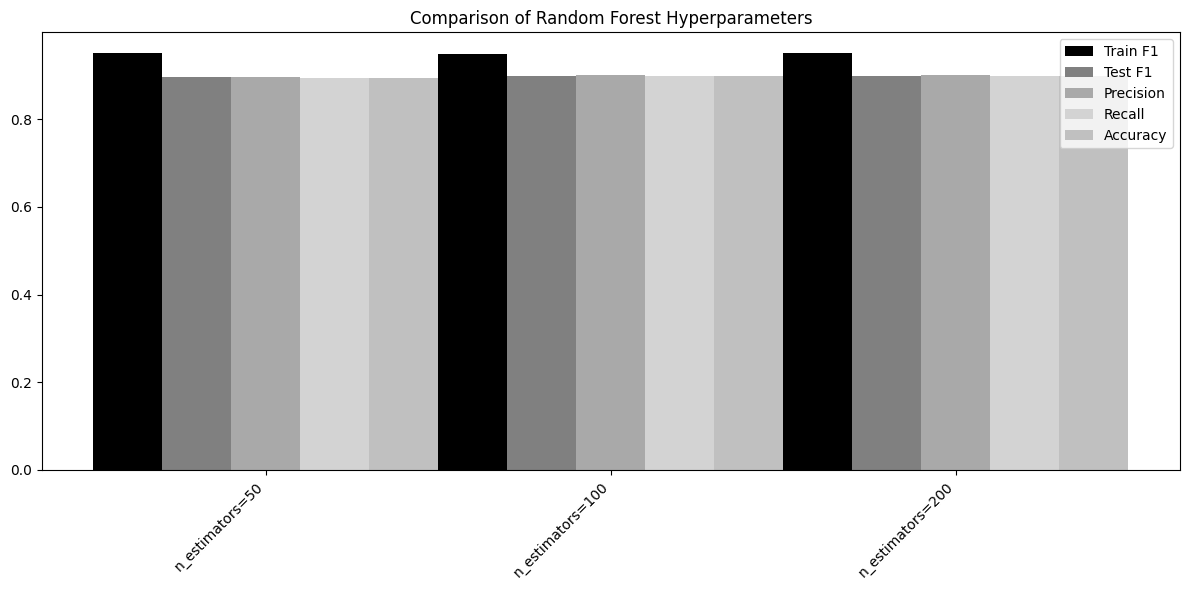

In [ ]:
plot_rf_results(results_df)

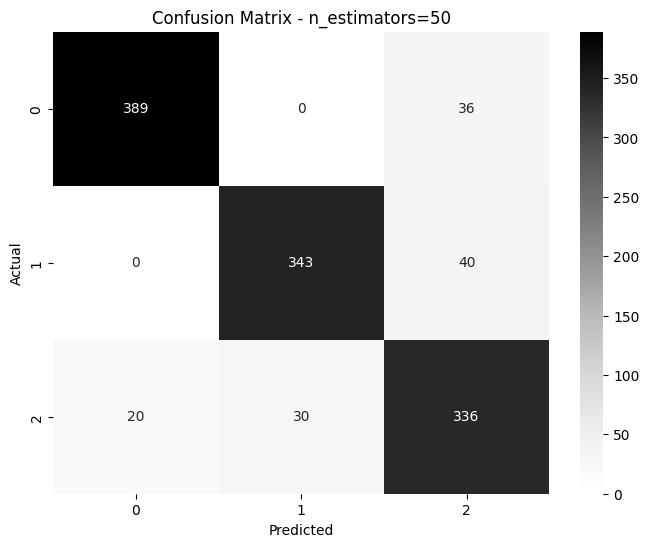

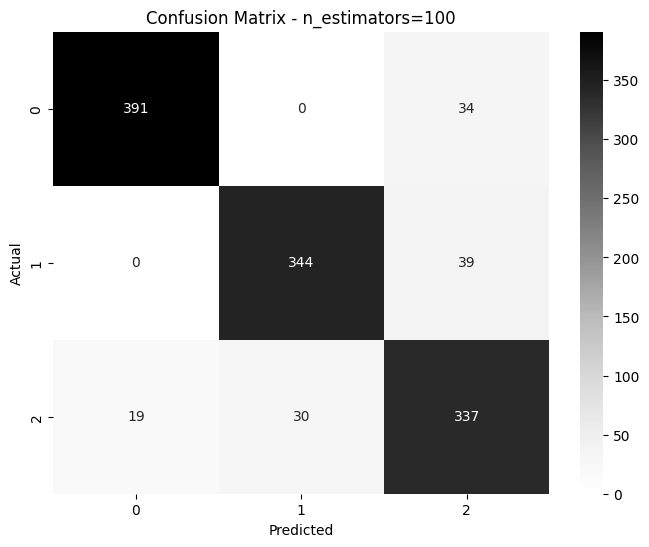

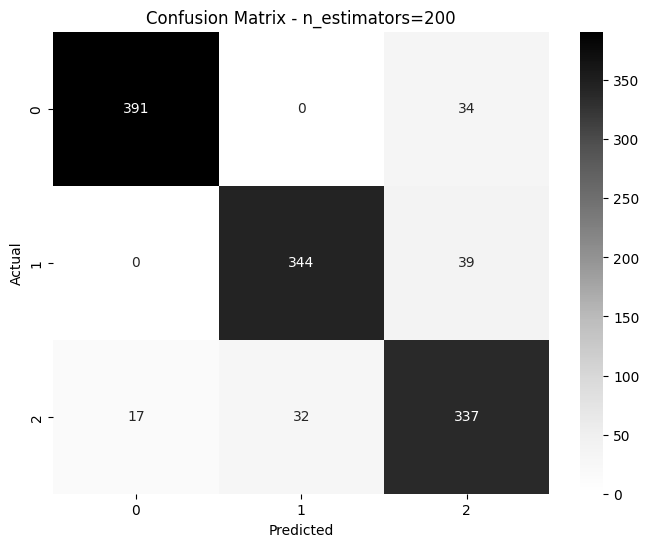

In [ ]:
plot_confusion_matrices(all_cm)

#### **4.2.5. Analisis Hasil**
---

Model Random Forest dengan berbagai jumlah estimators, yaitu 50, 100, dan 200, menunjukkan performa yang sangat baik dengan akurasi berkisar antara 89,4% hingga 89,8%. Hal ini mengindikasikan bahwa model mampu memprediksi dengan tingkat kesalahan yang relatif kecil. Selain itu, nilai F1-Score pada data uji juga cukup tinggi, berkisar antara 0,895 hingga 0,899, yang menunjukkan keseimbangan yang baik antara presisi dan recall. Secara keseluruhan, performa model menunjukkan bahwa Random Forest efektif digunakan pada dataset ini.

Peningkatan jumlah estimators dari 50 ke 200 tidak memberikan peningkatan performa yang signifikan. Meskipun F1-Score pada data uji sedikit meningkat dari 0,895 menjadi 0,899, perubahan ini relatif kecil. Begitu pula dengan nilai presisi dan recall yang tidak berubah secara signifikan meskipun jumlah estimators bertambah. Akurasi model juga tetap stabil pada nilai sekitar 0,8978 untuk n_estimators 100 dan 200. Hal ini menunjukkan bahwa penggunaan 100 estimators sudah cukup optimal, karena peningkatan lebih lanjut tidak memberikan perubahan berarti dalam performa model.

Berdasarkan confusion matrix dari model Random Forest dengan jumlah estimator (n_estimators) 50, 100, dan 200, dapat disimpulkan bahwa model ini secara keseluruhan memiliki performa yang cukup baik dalam mengklasifikasikan data. Pada ketiga model, kelas 0 dan 1 memiliki akurasi prediksi yang tinggi, ditunjukkan dengan jumlah prediksi benar yang mendominasi diagonal utama. Model dengan 50 estimator memiliki prediksi benar untuk kelas 0 sebanyak 389, kelas 1 sebanyak 343, dan kelas 2 sebanyak 336.

Berdasarkan confusion matrix, ketika jumlah estimator ditingkatkan menjadi 100 dan 200, prediksi benar untuk kelas 0 dan 1 tidak mengalami perubahan yang signifikan, tetap berada di angka 391 dan 344, menunjukkan kestabilan model dalam mengenali dua kelas tersebut. Namun, pada kelas 2, terjadi sedikit peningkatan jumlah prediksi benar dari 336 menjadi 337 ketika estimator meningkat dari 50 ke 100 dan 200. Hal ini menunjukkan bahwa peningkatan jumlah estimator tidak memberikan dampak yang besar pada akurasi kelas 2.

Kesalahan prediksi atau misclassification cenderung terjadi pada kelas 2, yang terlihat dari adanya prediksi yang salah pada kelas 0 dan 1. Model dengan 50 estimator memiliki 20 kesalahan pada kelas 0 dan 30 kesalahan pada kelas 1 untuk kelas 2, sedangkan model dengan 100 dan 200 estimator menunjukkan sedikit perbaikan pada kelas 2, dengan kesalahan pada kelas 0 menurun menjadi 19 dan 17.

### **4.3. K-Nearest Neighbor**

#### **4.3.1. Teori**
---

 K-Nearest Neighbors (KNN) adalah salah satu algoritma *supervised learning* dalam machine learning yang umum digunakan untuk melakukan klasifikasi. Dalam KNN, sebuah data baru diklasifikasikan berdasarkan mayoritas label dari K tetangga terdekatnya, di mana kedekatan biasanya diukur menggunakan metrik seperti Euclidean Distance, Manhattan Distance, atau Minkowski Distance, dengan prinsip dasarnya adalah data dengan karakteristik serupa cenderung berada berdekatan. Algoritma KNN juga merupakan bagian dari model “lazy learning”, yang berarti bahwa algoritma ini hanya menyimpan dataset pelatihan dan tidak menjalani tahap pelatihan. Karena sangat bergantung pada memori untuk menyimpan semua data pelatihannya, metode ini juga disebut sebagai metode pembelajaran berbasis contoh atau berbasis memori. Kelebihan KNN adalah kemudahan implementasi dan adaptabilitasnya, tetapi kelemahannya meliputi komputasi yang berat untuk dataset besar dan sensitivitas terhadap data tidak relevan atau *noise*. Pemilihan nilai *K* yang optimal, biasanya ganjil, sangat penting untuk menyeimbangkan *overfitting* dan *underfitting*.

#### **4.3.2. Implementasi**
---

In [ ]:
#Membuat Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (4774, 4) (4774,)
Test set: (1194, 4) (1194,)


In [ ]:
#menentukan K yang tepat
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):

    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    std_acc[n-1] = np.std(y_hat == y_test)/np.sqrt(y_hat.shape[0])

#### **4.3.3. Hasil Pengujian**
---

Kode berikut dijalankan untuk melihat akurasi dari setiap nilai K dari 1 hingga 10, yang telah dihitung di blok kode sebelumnya.

In [ ]:
#Array akurasi dari setiap nilai K dari 1 hingga 10
mean_acc

array([0.86180905, 0.82495812, 0.83082077, 0.82328308, 0.81239531,
       0.79313233, 0.77470687, 0.75041876, 0.74288107])

In [ ]:
# Menampilkan nilai akurasi untuk setiap K
best_k = np.argmax(mean_acc) + 1
print(f'Best K: {best_k}, Accuracy: {mean_acc[best_k-1]:.4f}')

Best K: 1, Accuracy: 0.8618


Kode berikut adalah untuk menentukan F1-Score dari Training dan Testing data.

In [ ]:
#Menentukan F1-Score untuk Training data
f1_train = f1_score(y_train, knn.predict(X_train), average='weighted')
#Menentukan F1-Score untuk Testing data
f1_test = f1_score(y_test, y_hat, average='weighted')

print("F1-Score training:", f1_train)
print("F1-Score testing:", f1_test)

# Evaluasi Model dengan K terbaik
knn_best = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

F1-Score training: 0.7845883203601406
F1-Score testing: 0.738566859473571


#### **4.3.4. Grafik dan Tabel**
---

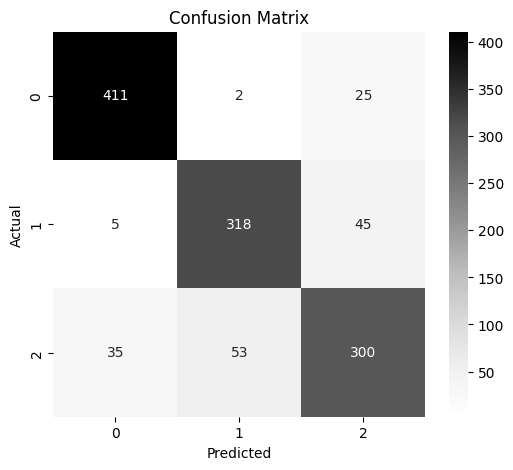

              precision    recall  f1-score      support
0              0.911308  0.938356  0.924634   438.000000
1              0.852547  0.864130  0.858300   368.000000
2              0.810811  0.773196  0.791557   388.000000
accuracy       0.861809  0.861809  0.861809     0.861809
macro avg      0.858222  0.858561  0.858164  1194.000000
weighted avg   0.860540  0.861809  0.860945  1194.000000


In [ ]:
# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Grays', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

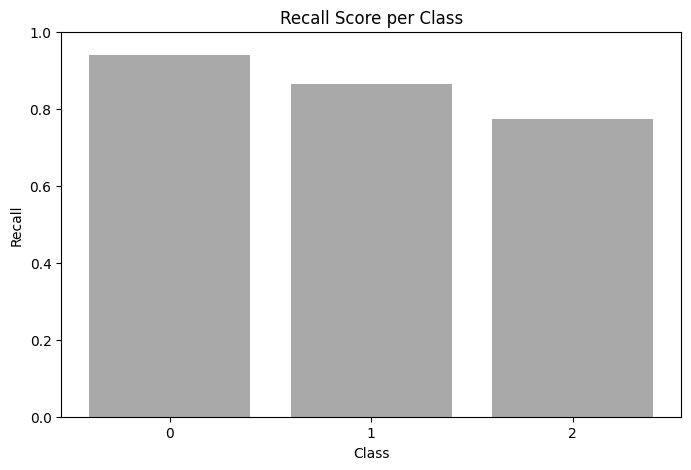

In [ ]:
# Grafik Recall per Kelas
recalls = recall_score(y_test, y_pred, average=None)
plt.figure(figsize=(8,5))
plt.bar(range(len(recalls)), recalls, tick_label=np.unique(y), color='darkgray')
plt.ylabel('Recall')
plt.xlabel('Class')
plt.title('Recall Score per Class')
plt.ylim([0,1])
plt.show()

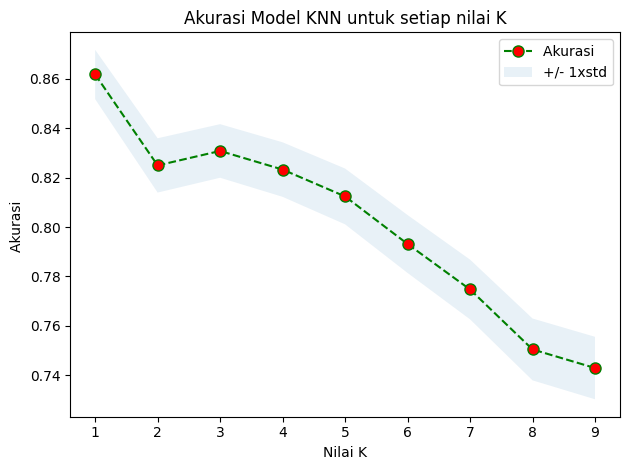

In [ ]:
#Visualisasi grafik untuk akurasi nilai K
plt.plot(range(1,Ks),mean_acc,'g', marker='o', linestyle='dashed', markerfacecolor='red', markersize=8)
plt.fill_between(range(1,Ks), (mean_acc - 1 * std_acc), (mean_acc + 1 * std_acc), alpha=0.10)
plt.legend(('Akurasi ', '+/- 1xstd'))
plt.ylabel('Akurasi ')
plt.xlabel('Nilai K')
plt.title('Akurasi Model KNN untuk setiap nilai K')
plt.tight_layout()
plt.show()

#### **4.3.5. Analisis Hasil**
---

Berdasarkan grafik hasil akurasi, nilai K yang terbaik berada di K = 1. Hanya satu data tetangga yang digunakan untuk melakukan prediksi dan memvalidasi data testing atau data baru. Nilai K yang sangat kecil menyebabkan model yang sangat kompleks, sehingga menghasilkan training yang overfitting. Oleh sebab itu, classifier jenis K-Nearest Neighbor tidak dapat digunakan untuk data BPS ini.

### **4.4. Naive Bayes**

#### **4.4.1. Teori**



Naïve Bayes adalah algoritma klasifikasi yang didasarkan pada Teorema Bayes, yang digunakan untuk menghitung probabilitas suatu kelas berdasarkan fitur-fitur yang diberikan. Algoritma ini mengasumsikan bahwa setiap fitur bersifat independen satu sama lain, meskipun dalam banyak kasus asumsi ini tidak sepenuhnya benar.

**Jenis-Jenis Naïve Bayes**

1. **GaussianNB**: Cocok untuk data numerik dengan distribusi normal.
2. **MultinomialNB**: Digunakan dalam klasifikasi teks dengan data kategori seperti frekuensi kata.
3. **BernoulliNB**: Sesuai untuk data biner, seperti keberadaan atau ketidakhadiran kata dalam dokumen.

**Keunggulan dan Kelemahan**

**Keunggulan**:
1. Cepat dan efisien dalam menangani dataset besar.
2. Dapat bekerja dengan data terbatas.
3. Cenderung tidak mengalami overfitting.

**Kelemahan**:
1. Asumsi independensi fitur sering kali tidak realistis.
2. Kurang akurat untuk data yang kompleks atau memiliki hubungan fitur yang kuat.
3. Meskipun memiliki beberapa keterbatasan, Naïve Bayes tetap menjadi pilihan populer, terutama dalam klasifikasi teks dan analisis sentimen karena kemudahan implementasi dan efisiensinya.

#### **4.4.2. Implementasi**
---

In [ ]:
# Inisialisasi model Naive Bayes
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

results = {}

# Latih dan uji setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi performa
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    results[name] = {"confusion_matrix": cm, "report": report}

#### **4.4.3. Hasil Pengujian**
---

Kode berikut dijalankan untuk mengevaluasi performa tiga model Naïve Bayes (GaussianNB, MultinomialNB, dan BernoulliNB) dengan melihat confusion matrix serta nilai precision, recall, dan F1-score untuk setiap model.

In [ ]:
# === **Tampilkan hasil dalam bentuk teks** ===
for model_name, result in results.items():
    print(f"\n=== {model_name} ===")
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\nClassification Report:")
    print(pd.DataFrame(result["report"]).transpose())


=== GaussianNB ===
Confusion Matrix:
[[392   0  46]
 [  2 300  66]
 [ 46  85 257]]

Classification Report:
              precision    recall  f1-score      support
0              0.890909  0.894977  0.892938   438.000000
1              0.779221  0.815217  0.796813   368.000000
2              0.696477  0.662371  0.678996   388.000000
accuracy       0.794807  0.794807  0.794807     0.794807
macro avg      0.788869  0.790855  0.789582  1194.000000
weighted avg   0.793304  0.794807  0.793789  1194.000000

=== MultinomialNB ===
Confusion Matrix:
[[396   6  36]
 [ 55 163 150]
 [ 64  81 243]]

Classification Report:
              precision    recall  f1-score      support
0              0.768932  0.904110  0.831060   438.000000
1              0.652000  0.442935  0.527508   368.000000
2              0.566434  0.626289  0.594859   388.000000
accuracy       0.671692  0.671692  0.671692     0.671692
macro avg      0.662455  0.657778  0.651142  1194.000000
weighted avg   0.667089  0.671692  0.660

#### **4.4.4. Grafik dan Tabel**
---

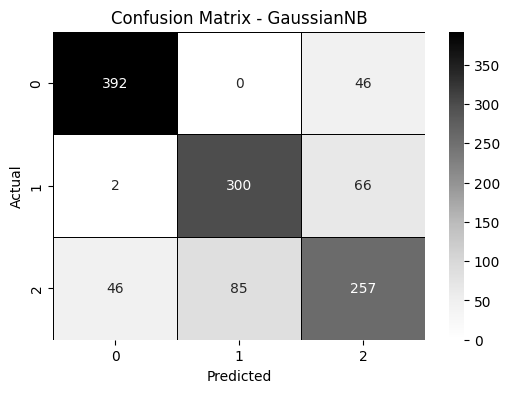

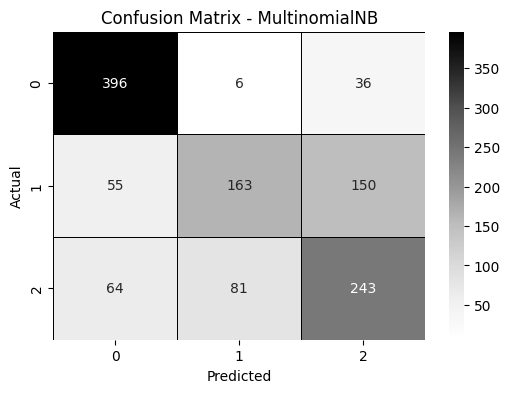

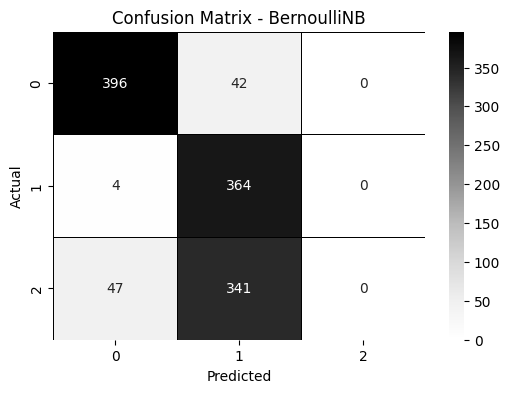

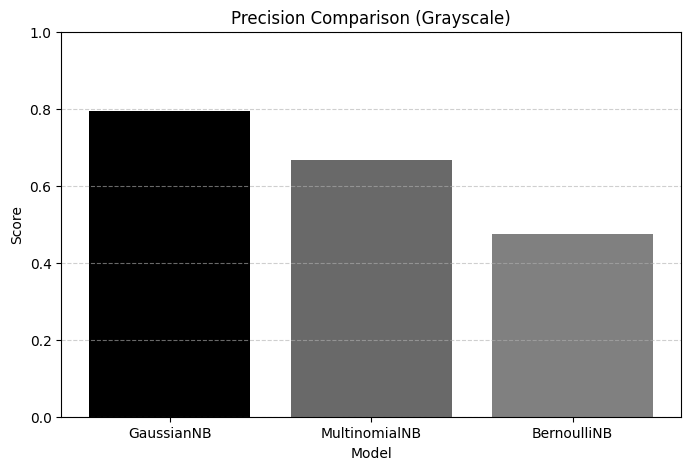

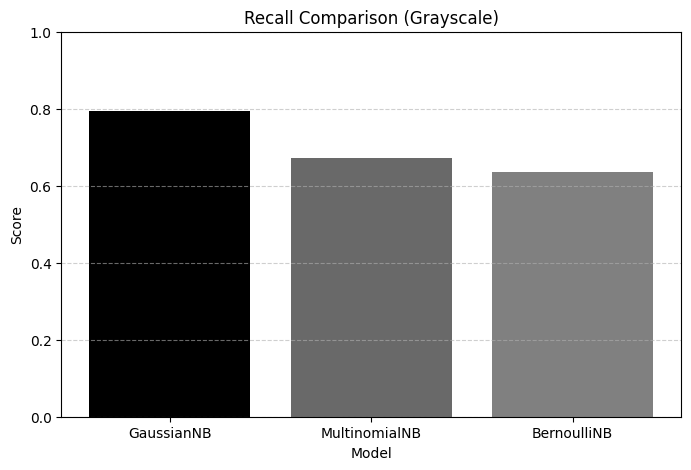

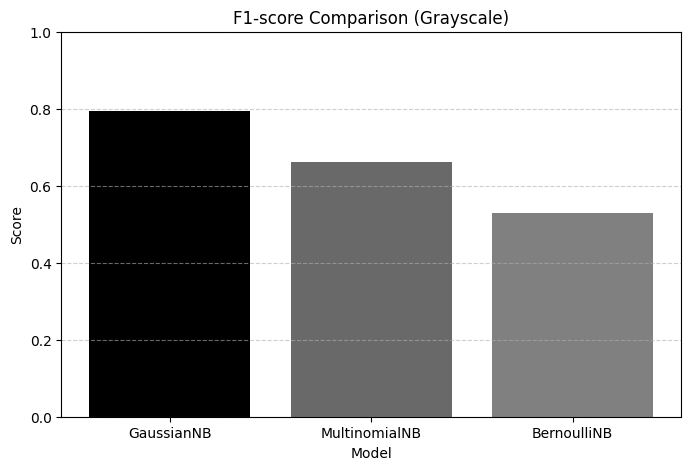

In [ ]:
# === **Plot Confusion Matrix dalam grayscale** ===
for model_name, result in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(result["confusion_matrix"], annot=True, fmt='d', cmap='Greys', linewidths=0.5, linecolor='black')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# === **Plot Grafik Performa (Precision, Recall, F1-Score)** ===
metrics = ["precision", "recall", "f1-score"]
x_labels = list(results.keys())  # Nama model (GaussianNB, MultinomialNB, BernoulliNB)

for metric in metrics:
    scores = [results[model]["report"]["weighted avg"][metric] for model in x_labels]

    plt.figure(figsize=(8, 5))
    plt.bar(x_labels, scores, color=["black", "dimgray", "gray"])
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.title(f"{metric.capitalize()} Comparison (Grayscale)")
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

#### **4.4.5. Analisis Hasil**
---

Dari hasil pengujian tiga model Naïve Bayes, yaitu GaussianNB, MultinomialNB, dan BernoulliNB, terlihat bahwa GaussianNB memiliki performa terbaik dalam mengklasifikasikan kategori konsumsi berdasarkan konsumsi dan pengeluaran per minggu. Hal ini dapat dilihat dari nilai precision, recall, dan F1-score yang lebih tinggi dibandingkan model lainnya, serta jumlah prediksi benar yang lebih banyak dalam confusion matrix. MultinomialNB menunjukkan hasil yang lebih rendah karena model ini lebih cocok untuk data diskrit dan tampaknya kurang sesuai untuk dataset yang digunakan. Sementara itu, BernoulliNB memiliki performa terburuk, karena model ini lebih cocok untuk data biner, sedangkan dataset ini memiliki nilai numerik yang lebih kompleks.

Secara keseluruhan, GaussianNB adalah model yang paling direkomendasikan untuk digunakan karena mampu memberikan hasil yang lebih stabil dan akurat. Untuk meningkatkan performa model lebih lanjut, dapat dilakukan feature engineering dengan menambahkan faktor lain seperti jumlah anggota rumah tangga atau tingkat ekonomi daerah, serta mencoba normalisasi data agar lebih sesuai untuk MultinomialNB. Namun, jika hanya mempertimbangkan hasil saat ini, GaussianNB tetap menjadi pilihan terbaik dalam melakukan klasifikasi kategori konsumsi.

## **5. Analisis Keseluruhan**

![Perbandingan Classifier](https://raw.githubusercontent.com/arifatalya/Proyek-UTS-AI01_14/main/assets/classifier-comparison.png)


### **5.1. Support Vector Machine (SVM)**


#### **5.1.1. SVM - Linear Kernel**
- **Train F1**: ~0.855
- **Test F1**: ~0.851
- **Akurasi**: ~85%
- Performa cukup baik, namun sedikit lebih rendah dibanding kernel lainnya.

#### **5.1.2. SVM - Polynomial Kernel**
- **Train F1**: 0.87–0.87
- **Test F1**: 0.84–0.86
- **Akurasi**: ~86%–87%
- Kernel polynomial dengan **C=20, degree=7** menghasilkan hasil terbaik.

#### **5.1.3. SVM - RBF Kernel**
- **Train F1**: 0.89–0.90
- **Test F1**: 0.88–0.89
- **Akurasi**: ~88%–89%
- **Kernel RBF dengan C=100, gamma=1** memberikan performa tertinggi.

**Kesimpulan SVM**:  
SVM dengan **kernel RBF** menghasilkan performa terbaik dibandingkan linear dan polynomial.

### **5.2. Random Forest**
- **Train F1**: 0.94–0.95
- **Test F1**: **0.89–0.90**
- **Akurasi**: **89%–90%**
- Model dengan **n_estimators=100** dan **n_estimators=200** menunjukkan performa terbaik.

**Kesimpulan Random Forest**:  
Performa **lebih tinggi dibanding SVM**, terutama dengan **test F1 mencapai 0.90**.

### **5.3. K-Nearest Neighbors**
- **Train F1**: 0.78
- **Test F1**: 0.74
- Akurasi: ~86%
- K Value terbaik: 1

**Kesimpulan K-Nearest Neighbors**:\
KNN memiliki nilai akurasi sebesar ~86%, tetapi akurasi tersebut adalah ketika hanya satu data tetangga yang digunakan.

### **5.4. Naive Bayes**


#### **5.4.1. GaussianNB**
- **Test F1**: **0.79**
- **Akurasi**: **79.4%**
- Precision dan recall cukup seimbang.

#### **5.4.2. MultinomialNB**
- **Test F1**: **0.67**
- **Akurasi**: **67.2%**
- Kinerja lebih rendah dibanding GaussianNB.


#### **5.4.3. BernoulliNB**
- **Test F1**: **0.63**
- **Akurasi**: **63.6%**
- Model gagal mengenali satu kelas dengan baik (**recall untuk kelas ke-3 adalah 0**).

**Kesimpulan Naive Bayes**:  
GaussianNB memiliki performa **paling baik** di antara varian Naive Bayes, namun secara keseluruhan tetap kurang bagus ketika dibandingkan dengan SVM dan Random Forest.

### **5.5. Kesimpulan Akhir**

Berdasarkan hasil pengujian terhadap berbagai model, Random Forest menunjukkan performa terbaik dengan nilai F1-score pada data uji mencapai 0.90, mengungguli model lain dalam hal akurasi dan keseimbangan antara presisi serta recall. Model SVM dengan kernel RBF juga memberikan hasil yang kompetitif dengan F1-score mendekati 0.89, namun masih sedikit lebih rendah dibandingkan Random Forest. Sementara itu, Naive Bayes, khususnya GaussianNB, memiliki kinerja yang paling baik di antara varian Naive Bayes, tetapi secara keseluruhan masih tertinggal dibandingkan SVM dan Random Forest, dengan F1-score maksimal sekitar 0.79. Oleh karena itu, untuk memperoleh prediksi yang lebih akurat dan andal dalam klasifikasi, model Random Forest dengan jumlah estimators 100 atau 200 direkomendasikan sebagai pilihan utama untuk dataset ini.

## **6. Referensi**


[1] “What are support vector machines (SVMs)?,” IBM, https://www.ibm.com/think/topics/support-vector-machine (accessed Mar. 22, 2025).

[2] “Major Kernel Functions in Support Vector Machine (SVM),” GeeksforGeeks, https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/ (accessed Mar. 22, 2025).

[3] P. Banerjee, “SVM Classifier Tutorial,” Kaggle, https://www.kaggle.com/code/prashant111/svm-classifier-tutorial (accessed Mar. 22, 2025).

[4] “Box Plot with plotly.express,” Plotly, https://plotly.com/python/box-plots/ (accessed Mar. 23, 2025).

[5] IBM, “Random Forest,” Ibm.com, Oct. 20, 2021. https://www.ibm.com/think/topics/random-forest (accessed Mar. 22, 2025)

‌[6] GeeksforGeeks, “Random forest algorithm in machine learning,” GeeksforGeeks, Jul. 12, 2024. https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ (accessed Mar. 22, 2025)

[7] P. Banerjee, “Random Forest Classifier Tutorial,” kaggle.com, 2020. https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial (accessed Mar. 22, 2025)

[8] N. Kumar, “Naive Bayes Classifiers - GeeksforGeeks,” GeeksforGeeks, Jan. 14, 2019. https://www.geeksforgeeks.org/naive-bayes-classifiers/ (accessed Mar. 23, 2025).

[9] A. Awan, “Naive Bayes Classifier Tutorial: with Python Scikit-learn,” www.datacamp.com, Mar. 2023. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn (accessed Mar. 26, 2025).

[10] IBM, “Naive Bayes,” Ibm.com, Oct. 06, 2021. https://www.ibm.com/think/topics/naive-bayes (accessed Mar. 26, 2025).

[11] "What is the k-nearest neighbors (KNN) algorithm?", IBM, https://www.ibm.com/think/topics/knn (Accessed Mar. 25, 2025).

[12] S. Aghaborzogi, "Module 3 - Classification", *Cognitiveclass ML0101EN - Machine Learning with Python*, 2020. https://apps.cognitiveclass.ai/learning/course/course-v1:BDU+ML0101EN+v4/ (Accessed Mar, 23, 2025).

[13] S. Aghaborzogi and J. Santarcangelo, "Lab: KNN", *Cognitiveclass ML0101EN - Machine Learning with Python*, 2020. https://apps.cognitiveclass.ai/learning/course/course-v1:BDU+ML0101EN+v4/ (Accessed Mar. 24, 2025).